# Test `regplot`

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import pygrutils.regplot as gr

## Basic usage

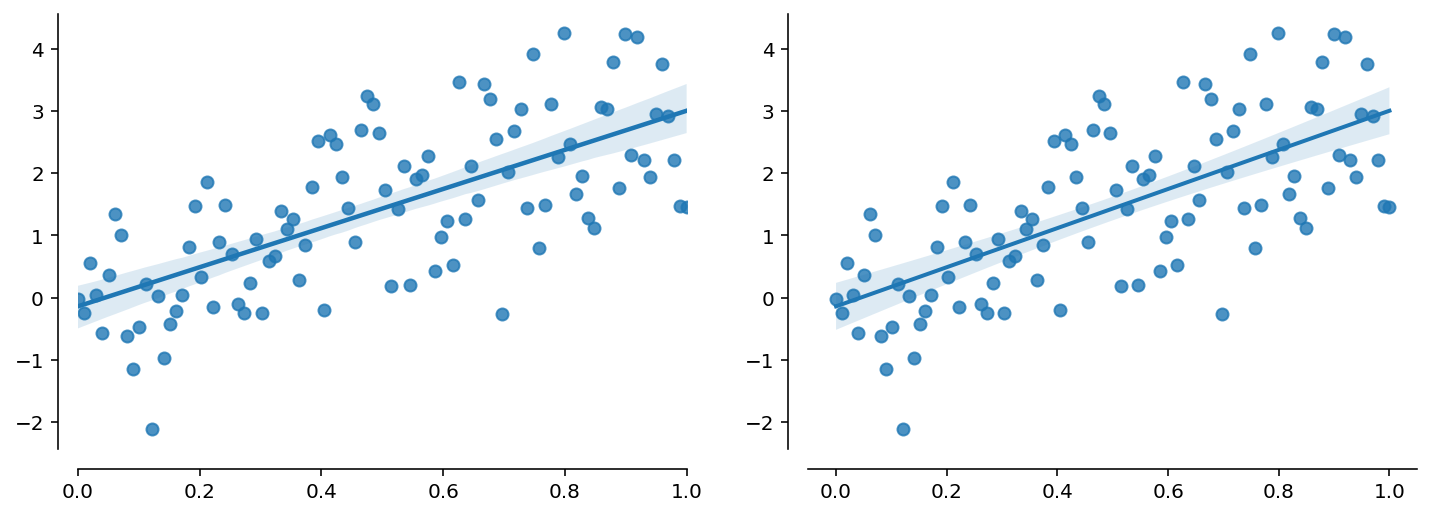

In [2]:
n = 100
alpha = 3.0
beta = -0.15
sigma = 1.0

rng = np.random.default_rng(0)
x = np.linspace(0, 1, n)
y = alpha * x + beta + sigma * rng.normal(size=n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=x, y=y, ax=ax1)
res = gr.regplot(x=x, y=y, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Custom plotting options

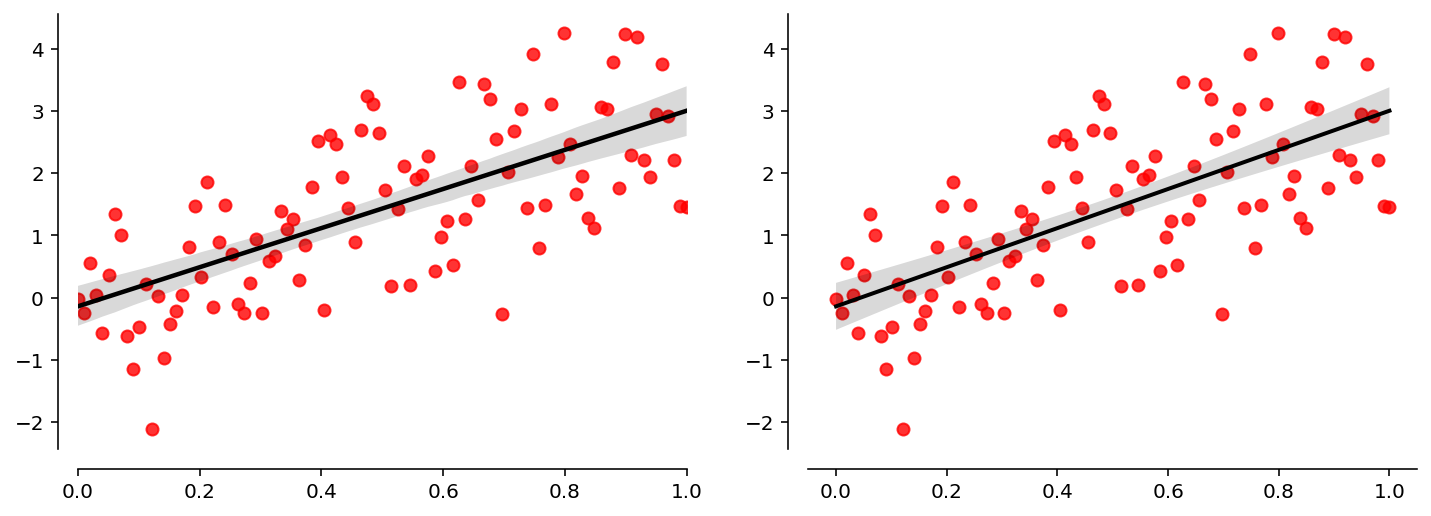

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

kwargs = {"scatter_kws": {"color": "r"}, "line_kws": {"color": "k"}}

sns.regplot(x=x, y=y, **kwargs, ax=ax1)
res = gr.regplot(x=x, y=y, **kwargs, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## `pygrutils`-specific plotting options

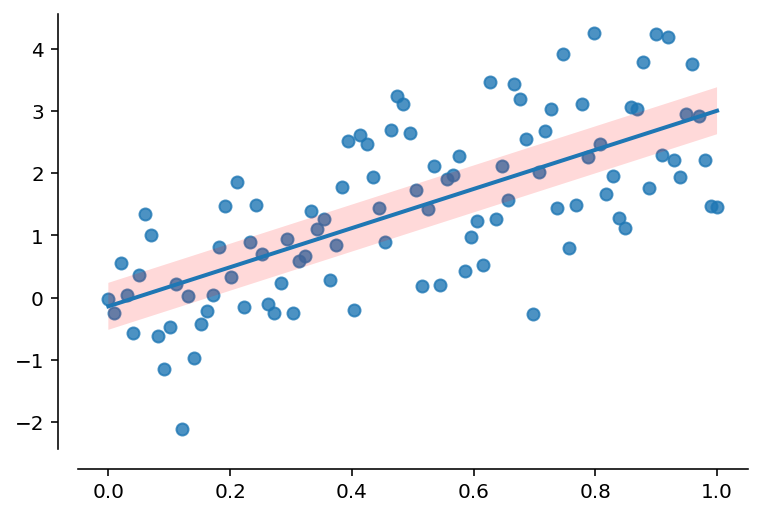

In [4]:
fig, ax = plt.subplots()

res = gr.regplot(x=x, y=y, ci_kws={"fc": "r"}, n_points=2, ax=ax)

sns.despine(offset=10, ax=ax)

## Robustness to few data points

`pygrutils.regplot` uses `statsmodels` for confidence-interval calculations. `seaborn` uses custom code. The two are similar but not exactly the same, especially when working with very few data points.

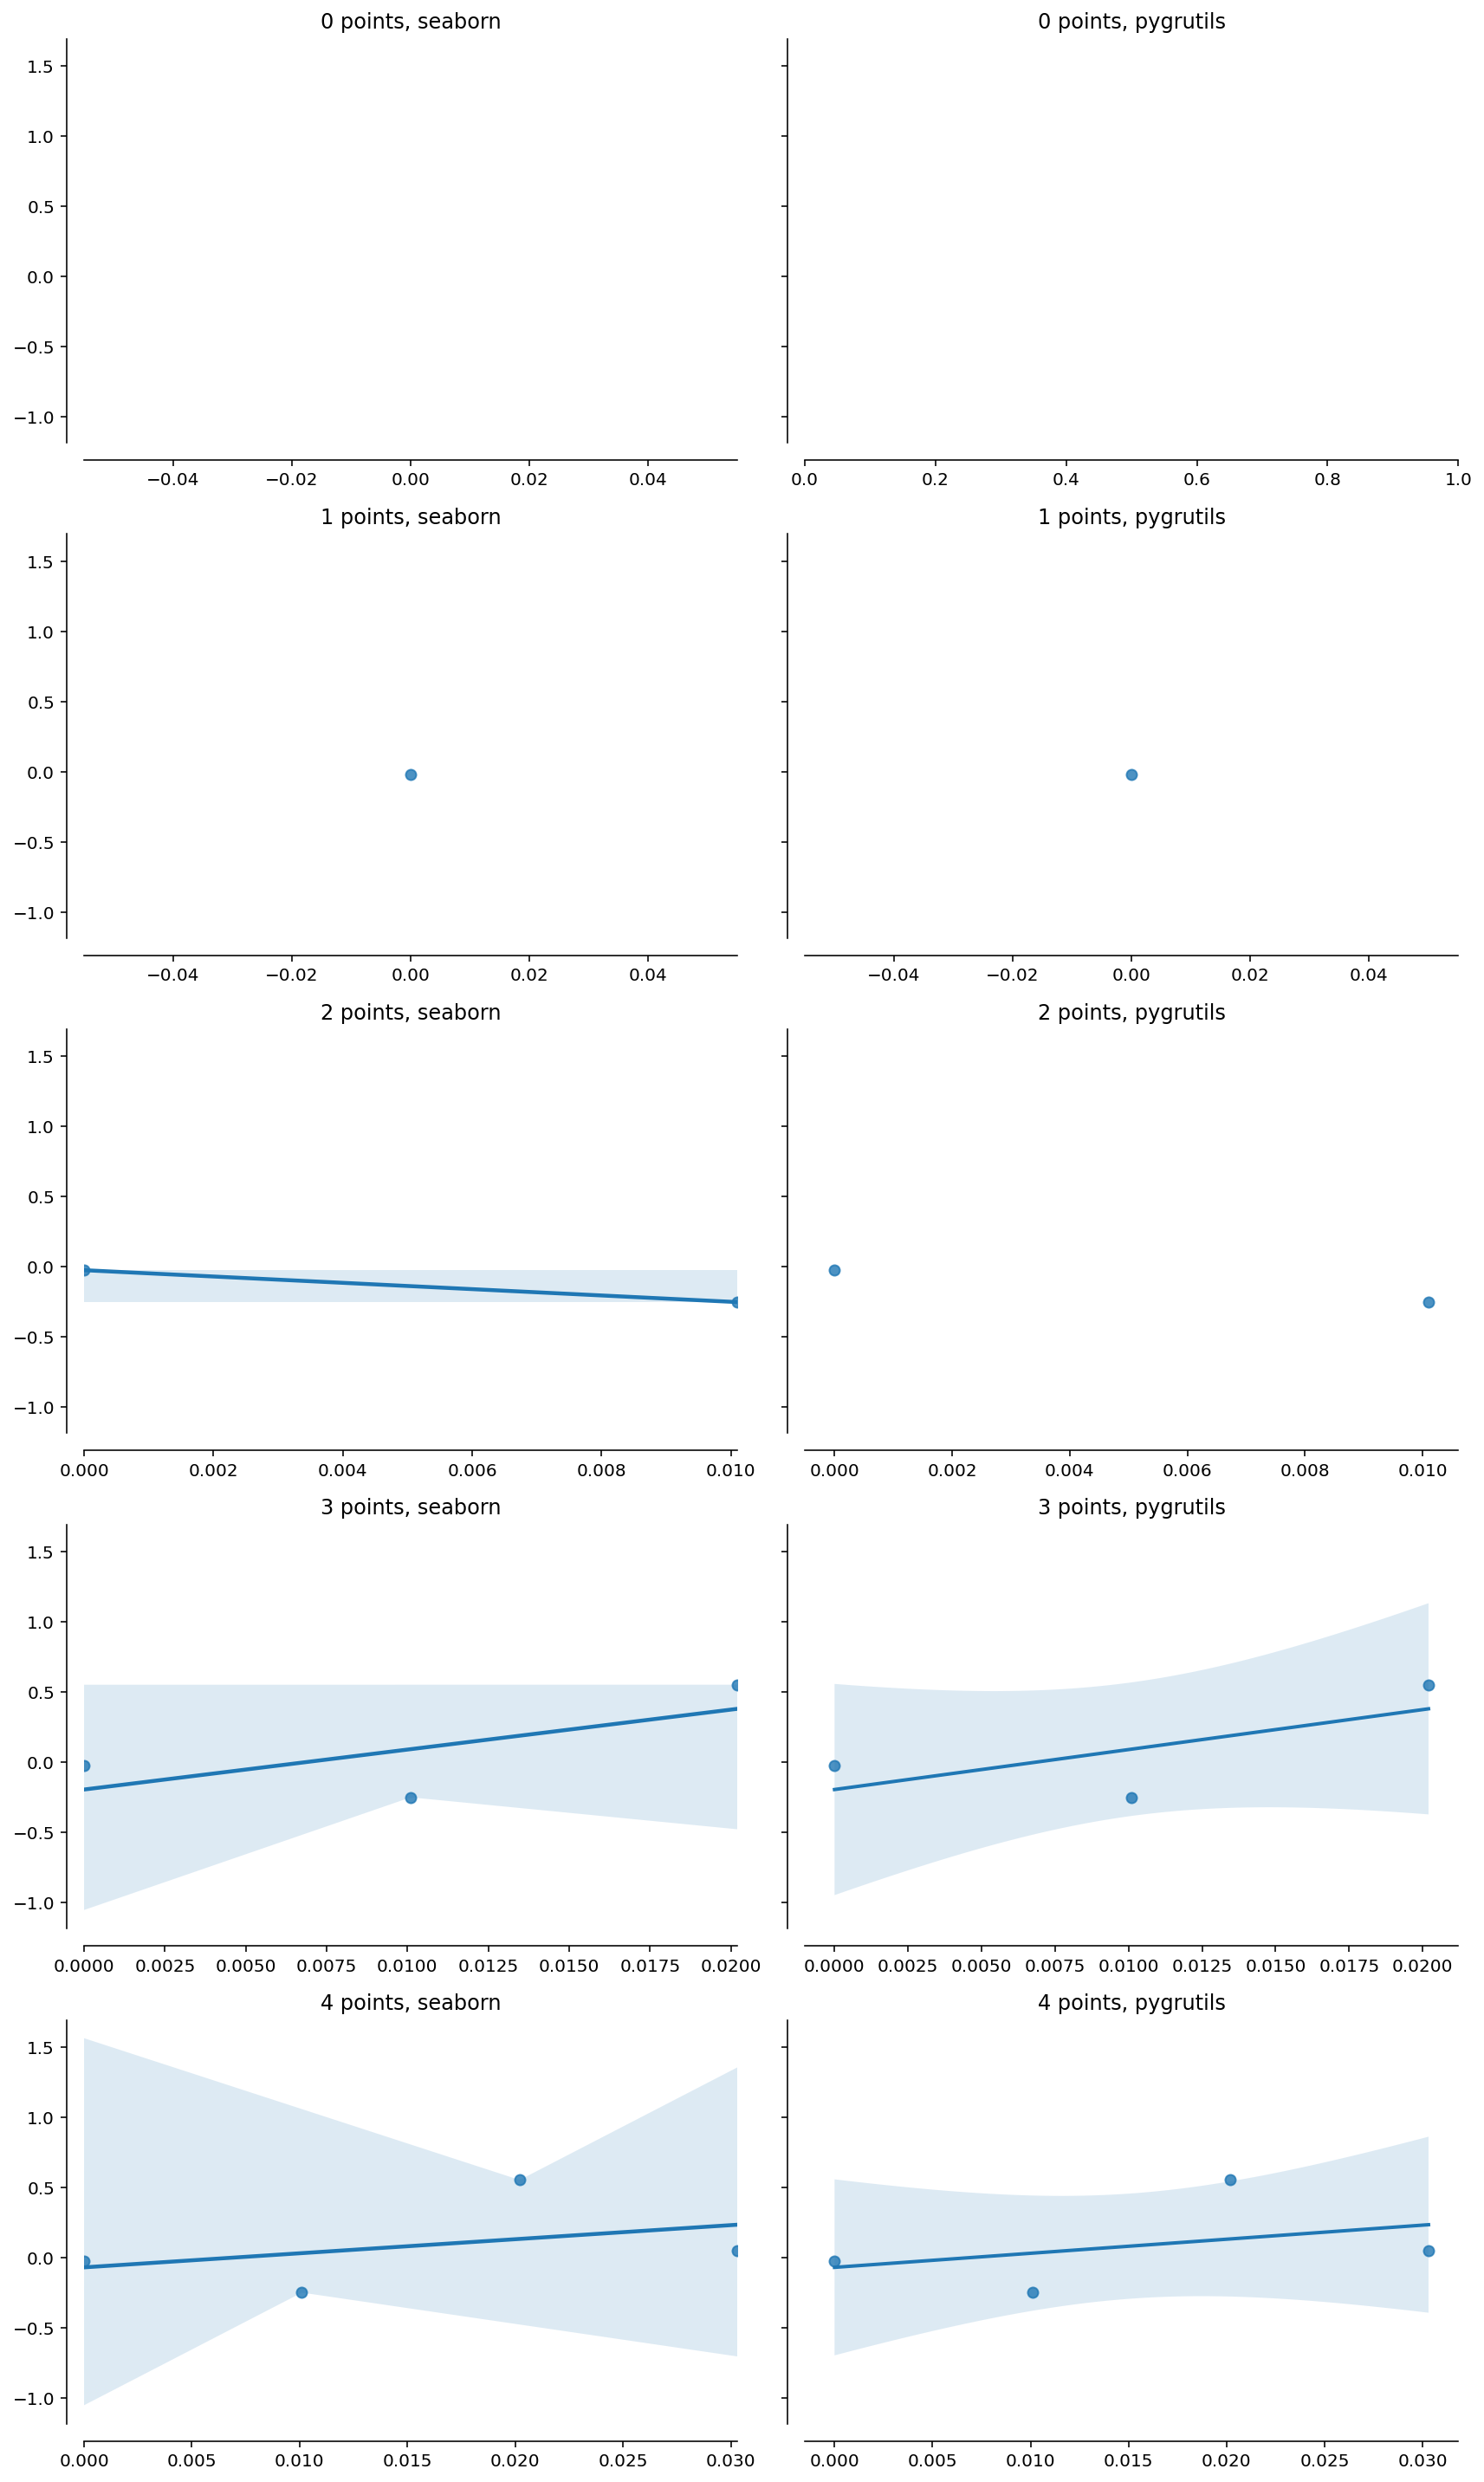

In [5]:
n_max = 5
fig, axs = plt.subplots(
    n_max, 2, figsize=(12, 4 * n_max), sharey=True, tight_layout=True
)

for i, crt_axs in enumerate(axs):
    crt_x = x[:i]
    crt_y = y[:i]

    sns.regplot(x=crt_x, y=crt_y, ax=crt_axs[0])
    gr.regplot(crt_x, crt_y, ax=crt_axs[1])

    for k, ax in enumerate(crt_axs):
        crt_name = ["seaborn", "pygrutils"][k]
        ax.set_title(f"{i} points, {crt_name}")
        sns.despine(offset=10, ax=ax)

## Usage with a `DataFrame`

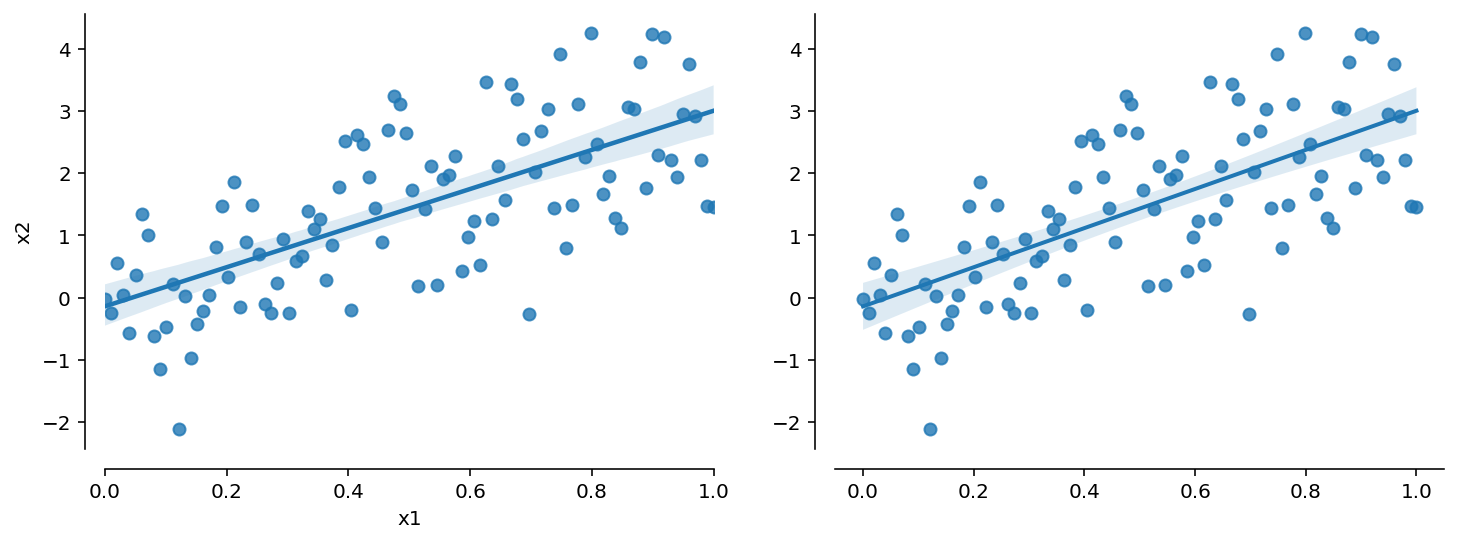

In [6]:
df = pd.DataFrame({"x1": x, "x2": y})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x="x1", y="x2", data=df, ax=ax1)
res = gr.regplot("x1", "x2", df, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Check turning on or off the display of the scatter plot or fit line, and label

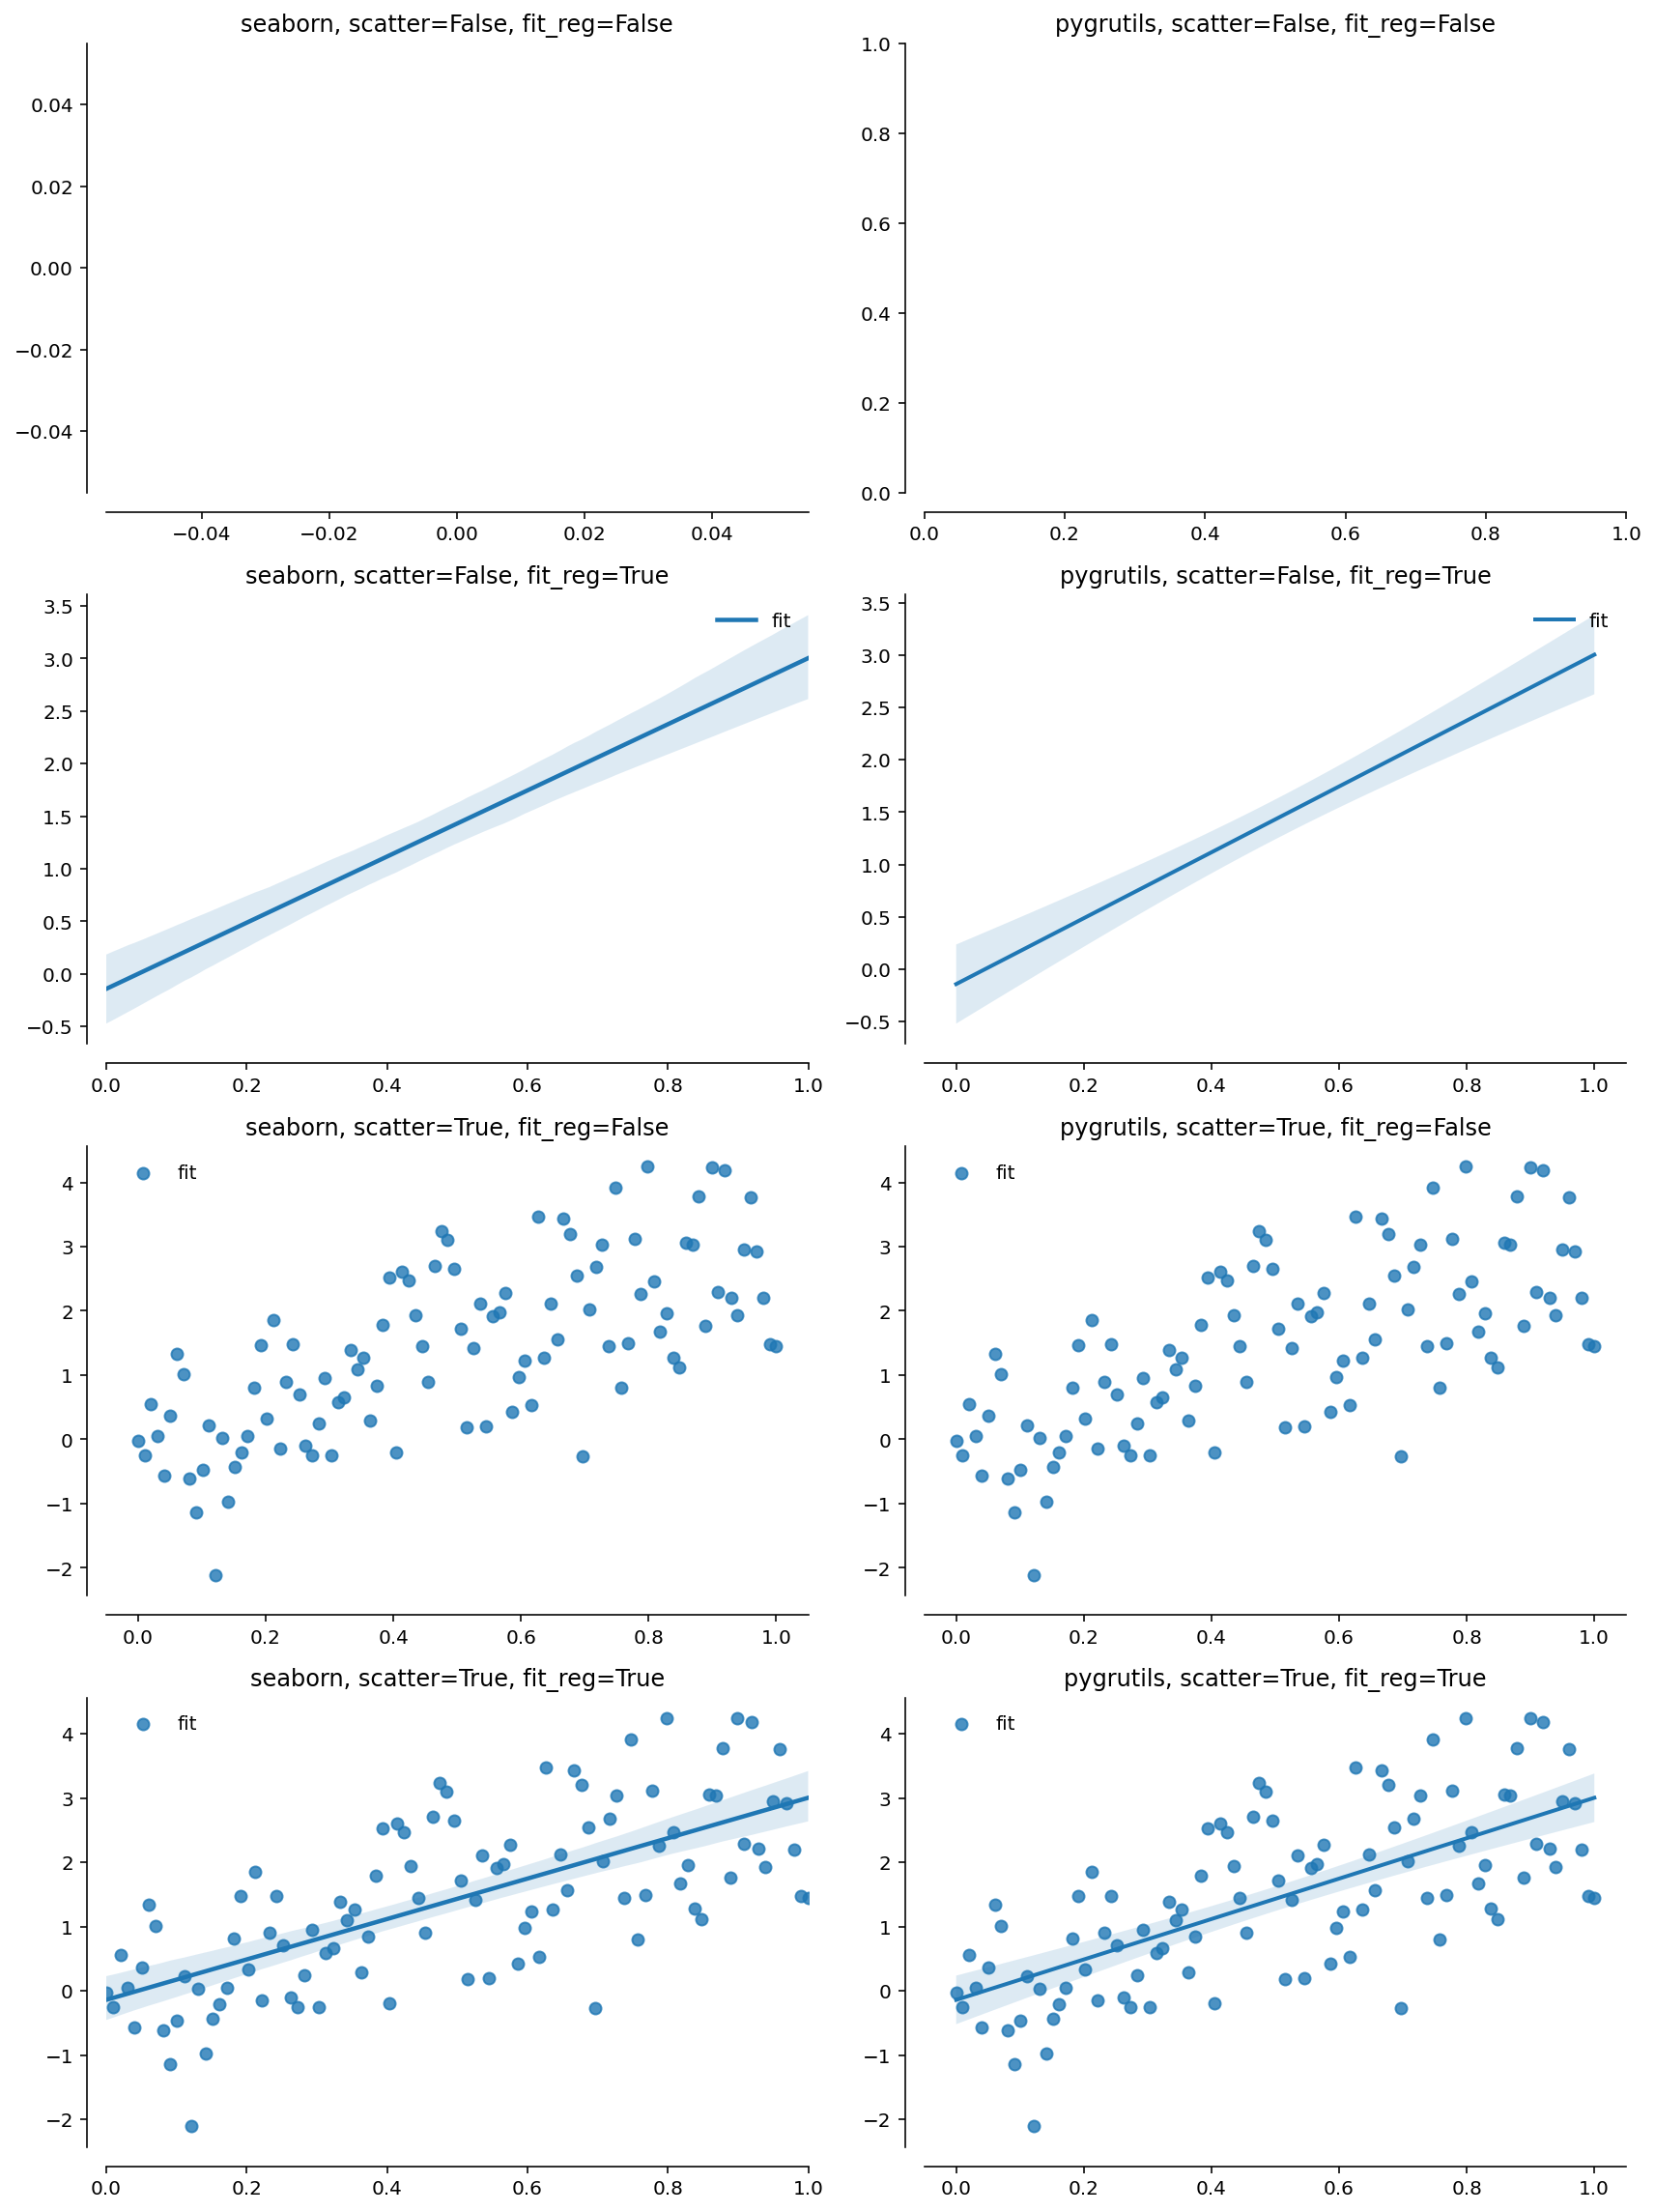

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16), tight_layout=True)

for i_scatter in range(2):
    crt_scatter = i_scatter != 0
    for i_fit in range(2):
        crt_fit = i_fit != 0

        i = i_scatter * 2 + i_fit

        sns.regplot(
            x=x, y=y, scatter=crt_scatter, fit_reg=crt_fit, label="fit", ax=axs[i, 0]
        )
        gr.regplot(
            x=x, y=y, scatter=crt_scatter, fit_reg=crt_fit, label="fit", ax=axs[i, 1]
        )
        
        if i > 0:
            axs[i, 0].legend(frameon=False)
            axs[i, 1].legend(frameon=False)

        axs[i, 0].set_title(f"seaborn, scatter={crt_scatter}, fit_reg={crt_fit}")
        axs[i, 1].set_title(f"pygrutils, scatter={crt_scatter}, fit_reg={crt_fit}")

for crt_axs in axs:
    for ax in crt_axs:
        sns.despine(offset=10, ax=ax)

## Check direct color and marker options

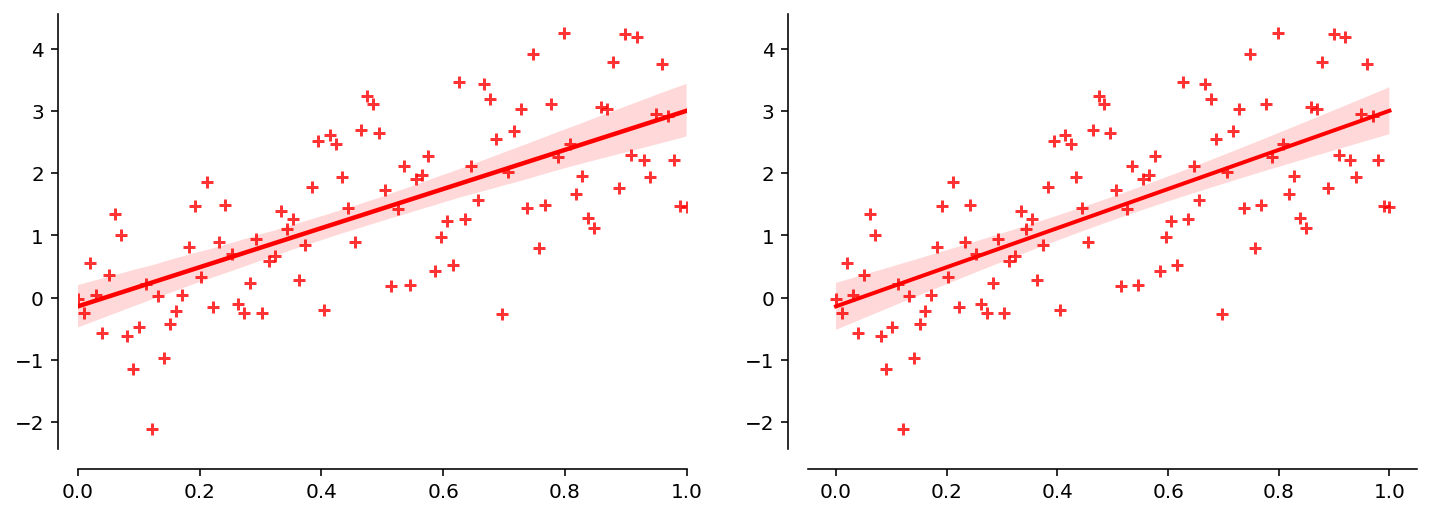

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

kwargs = {"color": "r", "marker": "+"}

sns.regplot(x=x, y=y, **kwargs, ax=ax1)
res = gr.regplot(x=x, y=y, **kwargs, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Check CI size

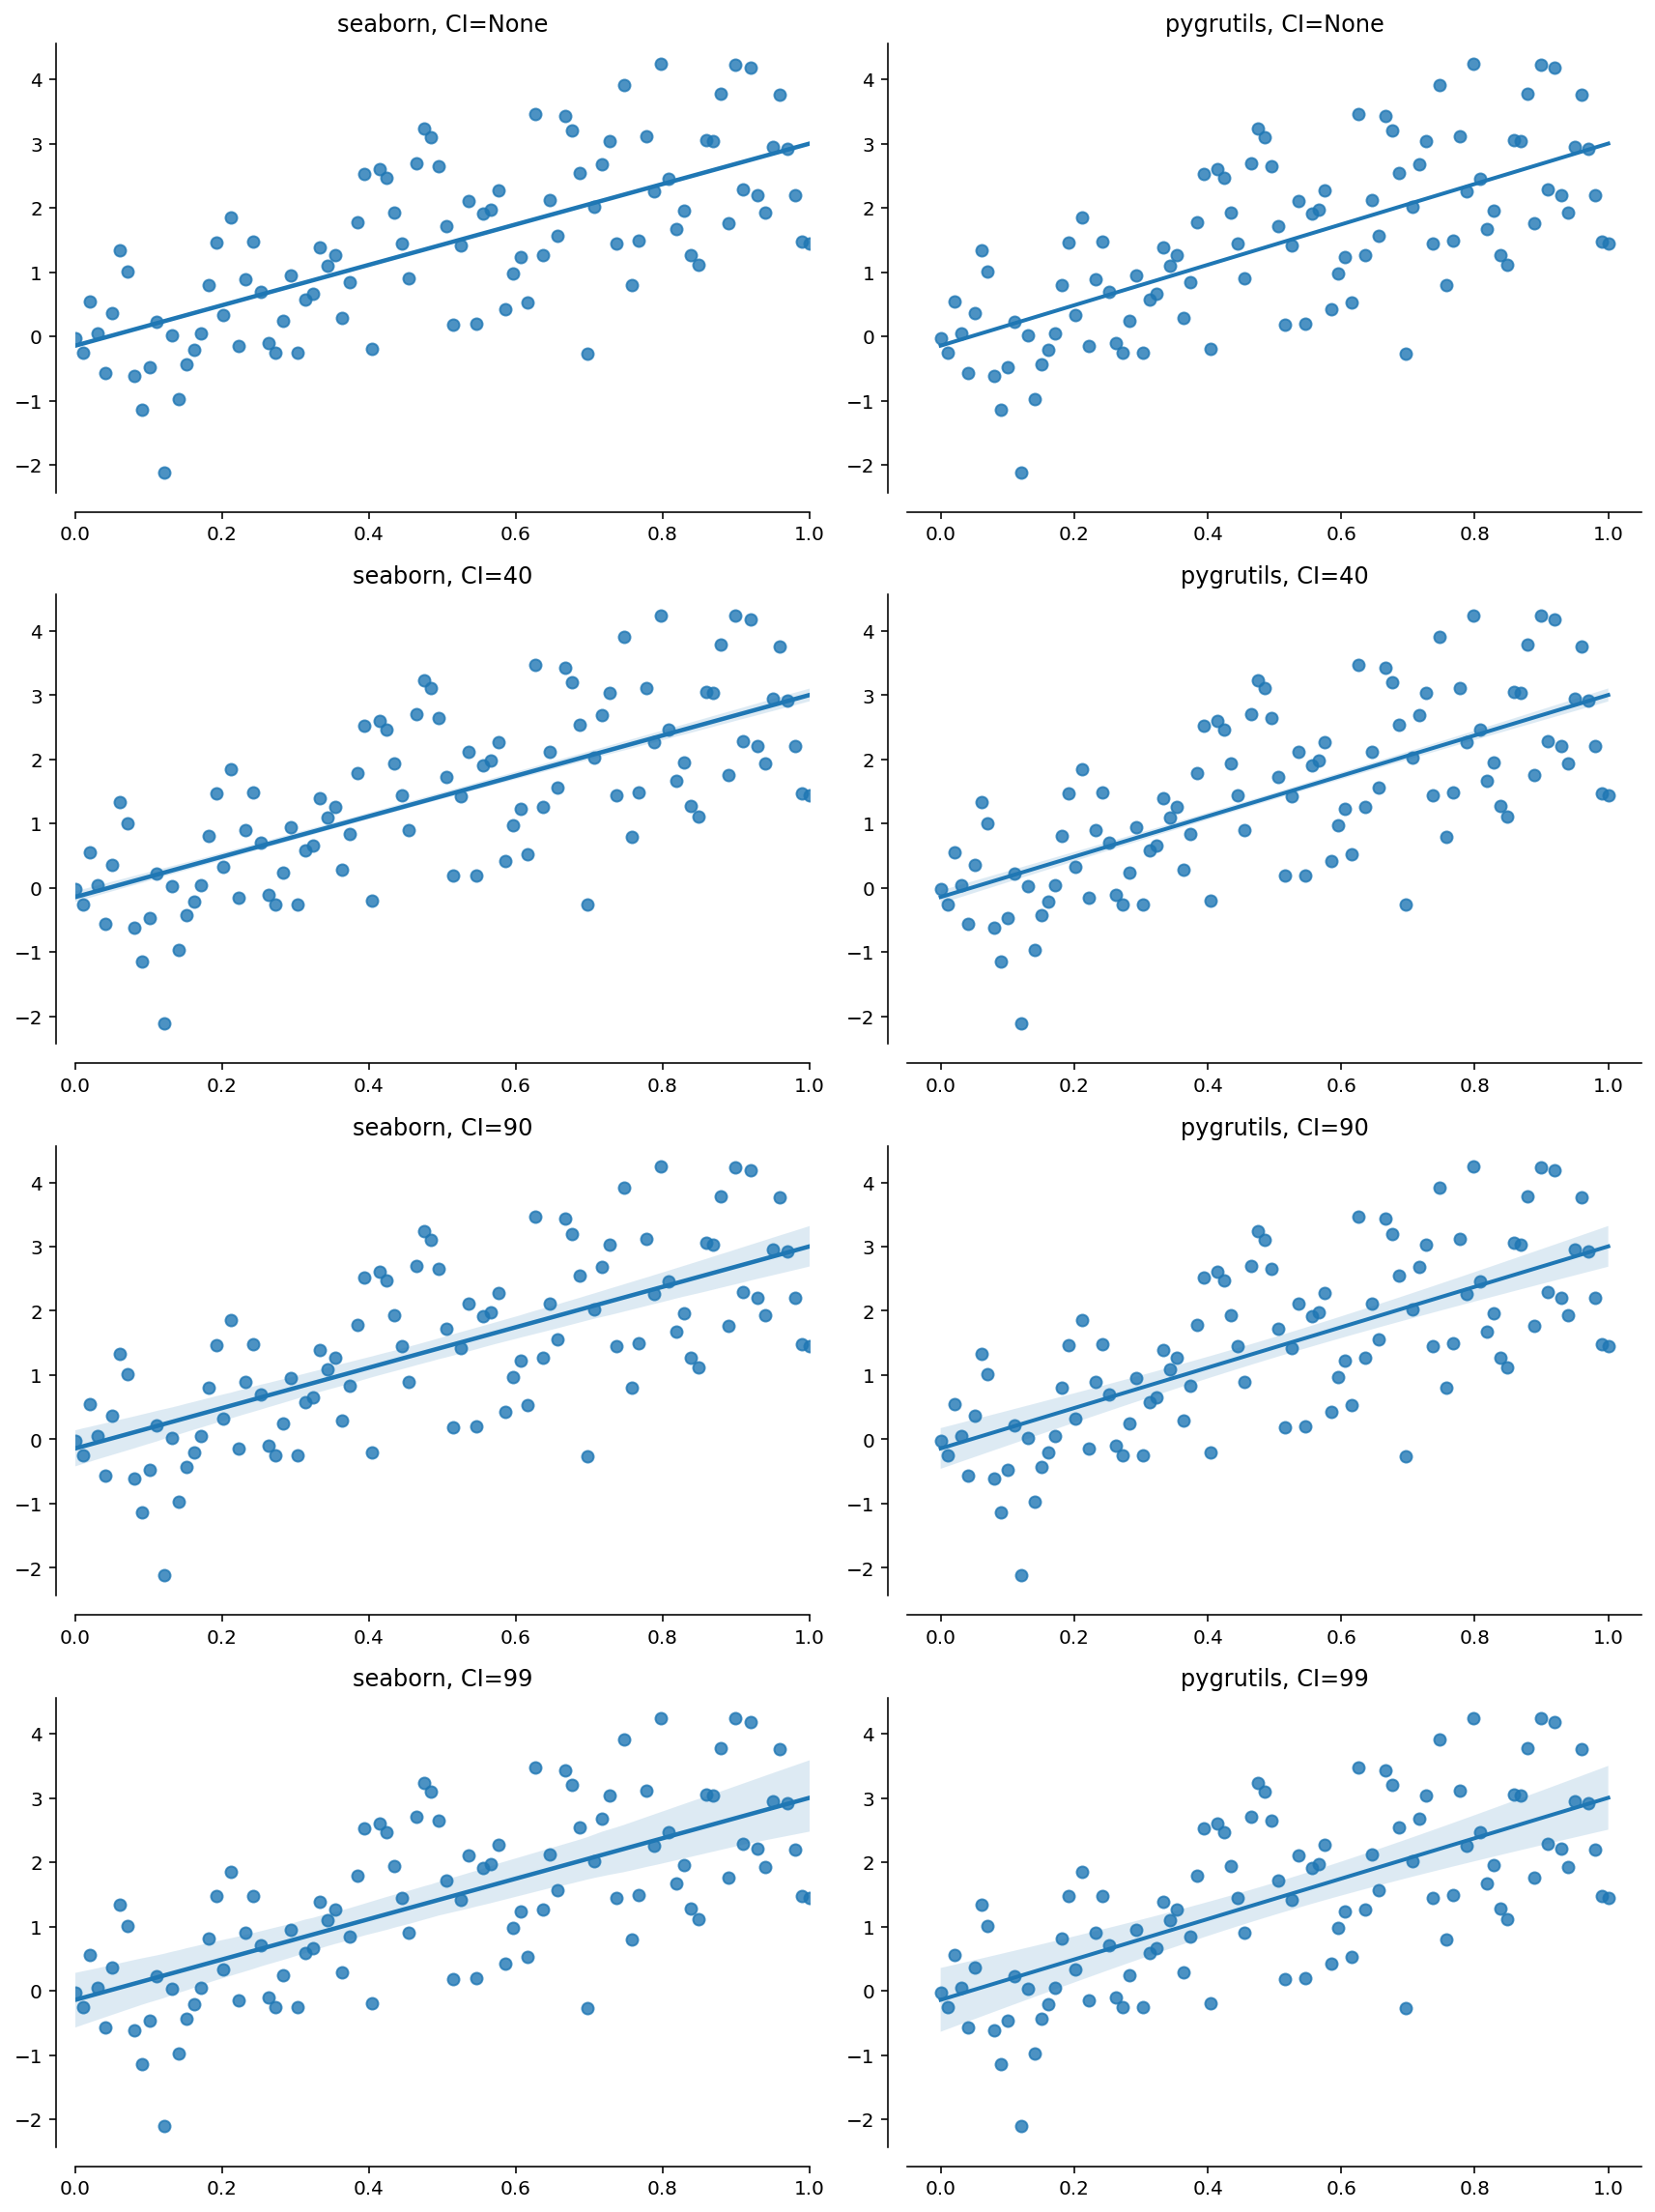

In [9]:
ci_vals = [None, 40, 90, 99]
n_ci = len(ci_vals)

fig, axs = plt.subplots(n_ci, 2, figsize=(12, n_ci * 4), tight_layout=True)

for i, ci in enumerate(ci_vals):
    crt_axs = axs[i]

    sns.regplot(x=x, y=y, ci=ci, ax=crt_axs[0])
    res = gr.regplot(x=x, y=y, ci=ci, ax=crt_axs[1])

    sns.despine(offset=10, ax=crt_axs[0])
    sns.despine(offset=10, ax=crt_axs[1])

    crt_axs[0].set_title(f"seaborn, CI={ci}")
    crt_axs[1].set_title(f"pygrutils, CI={ci}")

## Check truncate

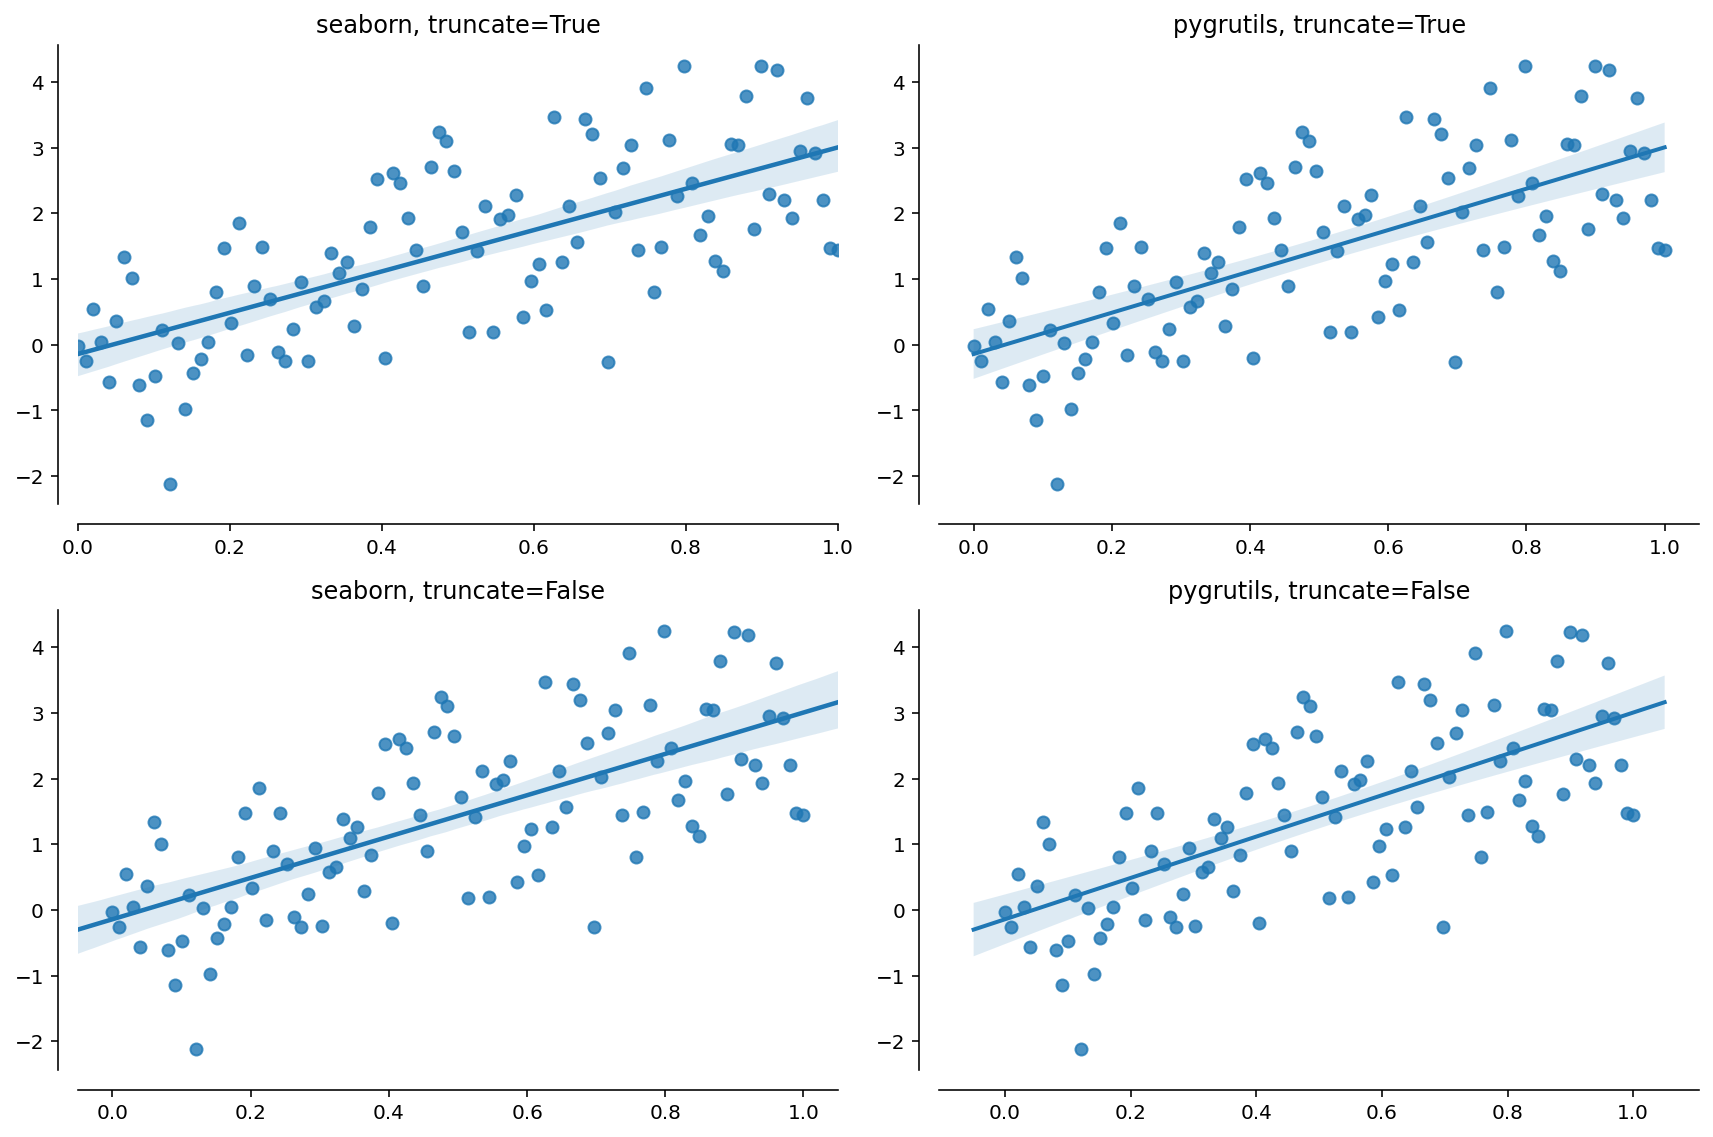

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)

for i, crt_axs in enumerate(axs):
    sns.regplot(x=x, y=y, truncate=i == 0, ax=crt_axs[0])
    res = gr.regplot(x=x, y=y, truncate=i == 0, ax=crt_axs[1])

    sns.despine(offset=10, ax=crt_axs[0])
    sns.despine(offset=10, ax=crt_axs[1])

    crt_axs[0].set_title(f"seaborn, truncate={i == 0}")
    crt_axs[1].set_title(f"pygrutils, truncate={i == 0}")

## Check higher order fits

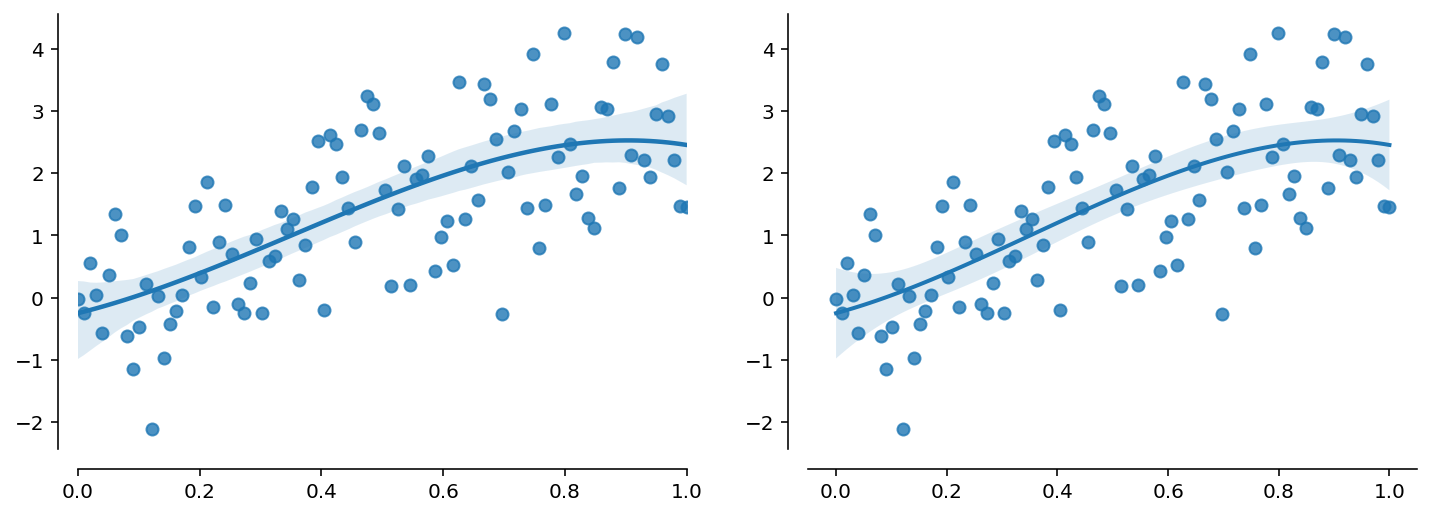

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

order = 3
sns.regplot(x=x, y=y, order=order, ax=ax1)
res = gr.regplot(x=x, y=y, order=order, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)